In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Membaca file CSV
filename = list(uploaded.keys())[0]  # Ambil nama file yang diupload
data = pd.read_csv(filename)  # Membaca dataset

# Tampilkan informasi dataset
print(data.info())  # Periksa struktur dataset
print(data.head())  # Tampilkan beberapa baris pertama


Saving StressLevelDataset.csv to StressLevelDataset (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          

# **Distribusi Binomial**

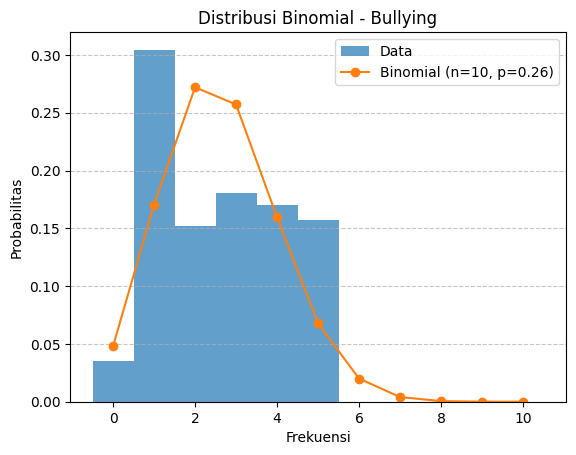

Parameter Distribusi Binomial:
- n (Jumlah Percobaan): 10
- p (Peluang Keberhasilan): 0.2617272727272727
- Mean (Rata-rata): 2.617272727272727
- Variance (Variansi): 1.9322610743801654
- Standard Deviation (Standar Deviasi): 1.390057939216983

Uji Goodness-of-Fit (Chi-Square Test):
- Chi-Square Statistic: 360.27
- p-value: 0.0000
Kesimpulan: Data tidak sesuai dengan distribusi Binomial (perbedaan signifikan ditemukan).


In [ ]:
# Import library tambahan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, chisquare

# Variabel Bullying
bullying = data['bullying']  # Mengakses kolom bullying

# Parameter Distribusi Binomial
n = 10  # Jumlah percobaan
p = bullying.mean() / n  # Peluang keberhasilan berdasarkan data
x = np.arange(0, n + 1)
binom_pmf = [binom.pmf(k, n, p) for k in x]

# Plot histogram dan distribusi Binomial
plt.hist(bullying, bins=np.arange(0, n + 2) - 0.5, density=True, alpha=0.7, label="Data")
plt.plot(x, binom_pmf, 'o-', label=f"Binomial (n={n}, p={p:.2f})")
plt.title("Distribusi Binomial - Bullying")
plt.xlabel("Frekuensi")
plt.ylabel("Probabilitas")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menghitung parameter untuk Distribusi Binomial
mean_binomial = n * p  # Mean
var_binomial = n * p * (1 - p)  # Variance
std_binomial = np.sqrt(var_binomial)  # Standard Deviation

# Hasil perhitungan
binomial_parameters = {
    "n (Jumlah Percobaan)": n,
    "p (Peluang Keberhasilan)": p,
    "Mean (Rata-rata)": mean_binomial,
    "Variance (Variansi)": var_binomial,
    "Standard Deviation (Standar Deviasi)": std_binomial,
}

# Tampilkan hasil parameter Distribusi Binomial
print("Parameter Distribusi Binomial:")
for key, value in binomial_parameters.items():
    print(f"- {key}: {value}")

# Uji goodness-of-fit (Chi-Square Test)
freq_actual, _ = np.histogram(bullying, bins=np.arange(0, n + 2))
freq_theoretical = [len(bullying) * binom.pmf(k, n, p) for k in range(len(freq_actual))]

chi2_stat, p_value = chisquare(freq_actual, f_exp=freq_theoretical)
print("\nUji Goodness-of-Fit (Chi-Square Test):")
print(f"- Chi-Square Statistic: {chi2_stat:.2f}")
print(f"- p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Kesimpulan: Data sesuai dengan distribusi Binomial (tidak ada perbedaan signifikan).")
else:
    print("Kesimpulan: Data tidak sesuai dengan distribusi Binomial (perbedaan signifikan ditemukan).")


# **Distribusi Poisson**

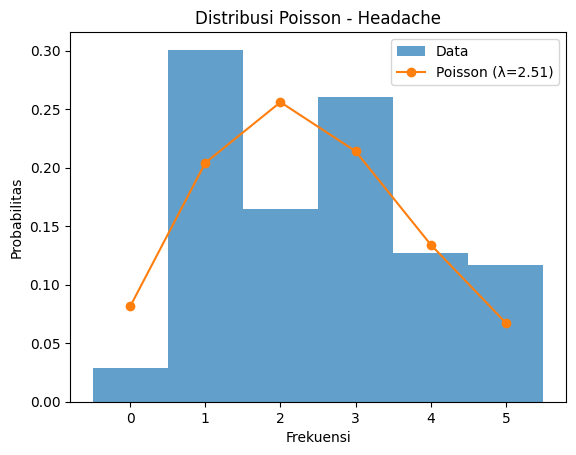

Hasil Perhitungan Distribusi Poisson:
- Mean (Rata-rata): 2.51
- Variance (Variansi): 2.51
- Standard Deviation (Standar Deviasi): 1.58

Tabel Distribusi Probabilitas:
P(X=0) = 0.0814
P(X=1) = 0.2042
P(X=2) = 0.2561
P(X=3) = 0.2141
P(X=4) = 0.1343
P(X=5) = 0.0673


In [ ]:
# Import library tambahan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Variabel Headache
headache = data['headache']  # Mengakses kolom headache

# Parameter Distribusi Poisson
lambda_poisson = np.mean(headache)  # Rata-rata data digunakan sebagai parameter lambda

# Distribusi Poisson
x = np.arange(0, max(headache) + 1)
poisson_pmf = [poisson.pmf(k, lambda_poisson) for k in x]

# Plot histogram dan distribusi Poisson
plt.hist(headache, bins=np.arange(0, max(headache) + 2) - 0.5, density=True, alpha=0.7, label="Data")
plt.plot(x, poisson_pmf, 'o-', label=f"Poisson (λ={lambda_poisson:.2f})")
plt.title("Distribusi Poisson - Headache")
plt.xlabel("Frekuensi")
plt.ylabel("Probabilitas")
plt.legend()
plt.show()

# Perhitungan tambahan untuk ditampilkan dalam teks
mean_poisson = lambda_poisson  # Mean distribusi Poisson
var_poisson = lambda_poisson  # Variansi distribusi Poisson
std_poisson = np.sqrt(var_poisson)  # Standar deviasi distribusi Poisson

# Tampilkan hasil perhitungan
print(f"Hasil Perhitungan Distribusi Poisson:")
print(f"- Mean (Rata-rata): {mean_poisson:.2f}")
print(f"- Variance (Variansi): {var_poisson:.2f}")
print(f"- Standard Deviation (Standar Deviasi): {std_poisson:.2f}")
print("\nTabel Distribusi Probabilitas:")
for i, prob in enumerate(poisson_pmf):
    print(f"P(X={i}) = {prob:.4f}")

# **Distribusi Hipergeometrik**

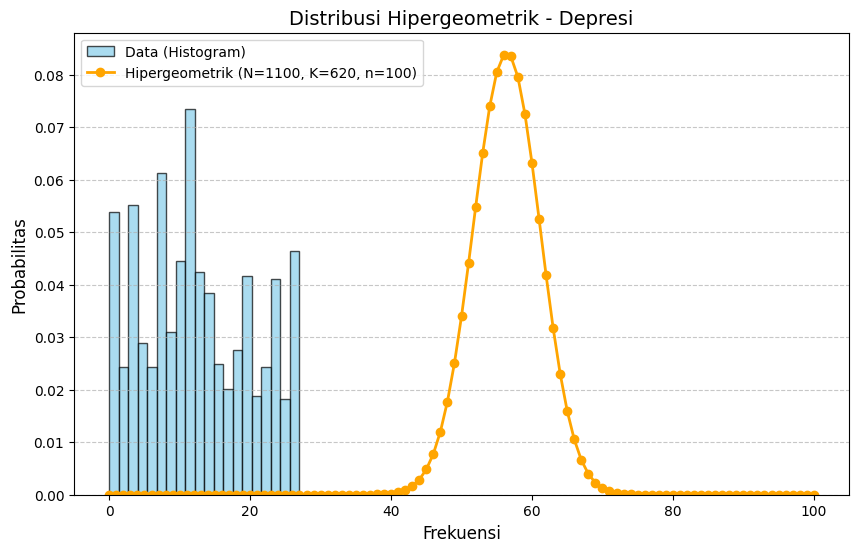

Hasil Perhitungan Distribusi Hipergeometrik:
- Mean (Rata-rata): 56.36
- Variance (Variansi): 22.38
- Standard Deviation (Standar Deviasi): 4.73

Uji Goodness-of-Fit (Chi-Square Test):
- Chi-Square Statistic: 1178227060658562471449005608875356848128.00
- p-value: 0.0000
Kesimpulan: Data tidak sesuai dengan distribusi Hipergeometrik (perbedaan signifikan ditemukan).


In [ ]:
# Import library tambahan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom, chisquare

# Variabel Depresi
depression = data['depression']  # Mengakses kolom depression
N = len(depression)  # Total populasi
K = (depression > 10).sum()  # Siswa dengan depresi di atas 10
n = 100  # Sampel acak

# Distribusi Hipergeometrik
x = np.arange(0, n + 1)
hypergeom_pmf = [hypergeom.pmf(k, N, K, n) for k in x]

# Plot histogram dan distribusi Hipergeometrik
plt.figure(figsize=(10, 6))
plt.hist(depression, bins=20, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Data (Histogram)")
plt.plot(x, hypergeom_pmf, 'o-', color="orange", label=f"Hipergeometrik (N={N}, K={K}, n={n})", linewidth=2)
plt.title("Distribusi Hipergeometrik - Depresi", fontsize=14)
plt.xlabel("Frekuensi", fontsize=12)
plt.ylabel("Probabilitas", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Perhitungan tambahan untuk ditampilkan dalam teks
mean_hypergeom = n * (K / N)  # Mean distribusi Hipergeometrik
var_hypergeom = n * (K / N) * (1 - K / N) * ((N - n) / (N - 1))  # Variansi distribusi Hipergeometrik
std_hypergeom = np.sqrt(var_hypergeom)  # Standar deviasi distribusi Hipergeometrik

# Tampilkan hasil perhitungan
print(f"Hasil Perhitungan Distribusi Hipergeometrik:")
print(f"- Mean (Rata-rata): {mean_hypergeom:.2f}")
print(f"- Variance (Variansi): {var_hypergeom:.2f}")
print(f"- Standard Deviation (Standar Deviasi): {std_hypergeom:.2f}")

# Uji Goodness-of-Fit (Chi-Square Test)
freq_actual, _ = np.histogram(depression, bins=np.arange(0, n + 2))
freq_theoretical = [len(depression) * hypergeom.pmf(k, N, K, n) for k in range(len(freq_actual))]

chi2_stat, p_value = chisquare(freq_actual, f_exp=freq_theoretical)
print("\nUji Goodness-of-Fit (Chi-Square Test):")
print(f"- Chi-Square Statistic: {chi2_stat:.2f}")
print(f"- p-value: {p_value:.4f}")

# Kesimpulan Uji Goodness-of-Fit
if p_value > 0.05:
    print("Kesimpulan: Data sesuai dengan distribusi Hipergeometrik (tidak ada perbedaan signifikan).")
else:
    print("Kesimpulan: Data tidak sesuai dengan distribusi Hipergeometrik (perbedaan signifikan ditemukan).")


# **Distribusi Normal**

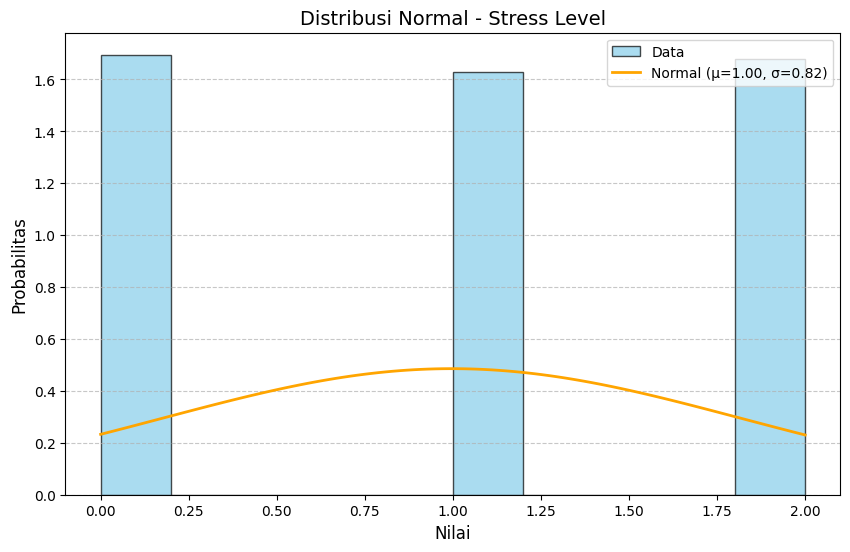

Hasil Perhitungan Distribusi Normal:
- Mean (Rata-rata): 1.00
- Standard Deviation (Standar Deviasi): 0.82

Uji Normalitas Shapiro-Wilk:
- Statistic: 0.7911
- p-value: 0.0000
Kesimpulan: Data kemungkinan tidak berdistribusi normal (p-value <= 0.05).

Uji Normalitas Kolmogorov-Smirnov:
- Statistic: 0.2266
- p-value: 0.0000
Kesimpulan: Data kemungkinan tidak berdistribusi normal (p-value <= 0.05).


In [ ]:
# Import library tambahan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest

# Variabel Stress Level
stress_level = data['stress_level']  # Mengakses kolom stress_level

# Parameter Distribusi Normal
mean_normal = np.mean(stress_level)
std_normal = np.std(stress_level)

# Distribusi Normal
x = np.linspace(min(stress_level), max(stress_level), 100)
normal_pdf = norm.pdf(x, mean_normal, std_normal)

# Plot histogram dan distribusi Normal
plt.figure(figsize=(10, 6))
plt.hist(stress_level, bins=10, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Data")
plt.plot(x, normal_pdf, color='orange', label=f"Normal (μ={mean_normal:.2f}, σ={std_normal:.2f})", linewidth=2)
plt.title("Distribusi Normal - Stress Level", fontsize=14)
plt.xlabel("Nilai", fontsize=12)
plt.ylabel("Probabilitas", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Tampilkan hasil perhitungan
print(f"Hasil Perhitungan Distribusi Normal:")
print(f"- Mean (Rata-rata): {mean_normal:.2f}")
print(f"- Standard Deviation (Standar Deviasi): {std_normal:.2f}")

# Uji Normalitas

# 1. Shapiro-Wilk Test
stat_shapiro, p_shapiro = shapiro(stress_level)
print("\nUji Normalitas Shapiro-Wilk:")
print(f"- Statistic: {stat_shapiro:.4f}")
print(f"- p-value: {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("Kesimpulan: Data kemungkinan berdistribusi normal (p-value > 0.05).")
else:
    print("Kesimpulan: Data kemungkinan tidak berdistribusi normal (p-value <= 0.05).")

# 2. Kolmogorov-Smirnov Test
stat_ks, p_ks = kstest(stress_level, 'norm', args=(mean_normal, std_normal))
print("\nUji Normalitas Kolmogorov-Smirnov:")
print(f"- Statistic: {stat_ks:.4f}")
print(f"- p-value: {p_ks:.4f}")
if p_ks > 0.05:
    print("Kesimpulan: Data kemungkinan berdistribusi normal (p-value > 0.05).")
else:
    print("Kesimpulan: Data kemungkinan tidak berdistribusi normal (p-value <= 0.05).")


# **Distribusi Eksponensial**

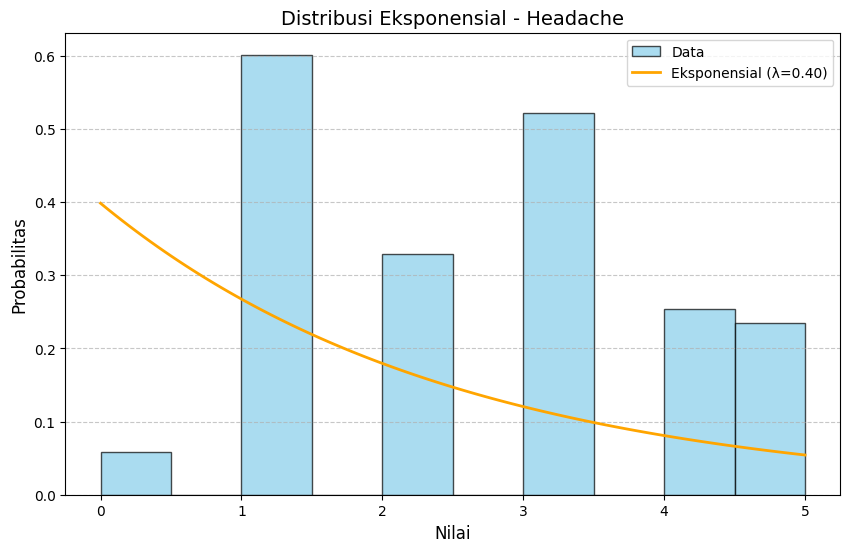

Hasil Perhitungan Distribusi Eksponensial:
- Mean (Rata-rata): 2.51
- Standard Deviation (Standar Deviasi): 2.51

Uji Goodness-of-Fit (Kolmogorov-Smirnov Test):
- Statistic: 0.2997
- p-value: 0.0000
Kesimpulan: Data tidak sesuai dengan distribusi Eksponensial (perbedaan signifikan ditemukan).


In [ ]:
# Import library tambahan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest

# Variabel Headache (misalnya, waktu antar kejadian)
headache = data['headache']

# Parameter Distribusi Eksponensial
lambda_exp = 1 / np.mean(headache)

# Distribusi Eksponensial
x = np.linspace(0, max(headache), 100)
exponential_pdf = lambda_exp * np.exp(-lambda_exp * x)

# Plot histogram dan distribusi Eksponensial
plt.figure(figsize=(10, 6))
plt.hist(headache, bins=10, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Data")
plt.plot(x, exponential_pdf, color='orange', label=f"Eksponensial (λ={lambda_exp:.2f})", linewidth=2)
plt.title("Distribusi Eksponensial - Headache", fontsize=14)
plt.xlabel("Nilai", fontsize=12)
plt.ylabel("Probabilitas", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Tampilkan hasil perhitungan
mean_exponential = 1 / lambda_exp  # Mean eksponensial
std_exponential = 1 / lambda_exp  # Standar deviasi eksponensial

print(f"Hasil Perhitungan Distribusi Eksponensial:")
print(f"- Mean (Rata-rata): {mean_exponential:.2f}")
print(f"- Standard Deviation (Standar Deviasi): {std_exponential:.2f}")

# Uji Goodness-of-Fit (Kolmogorov-Smirnov Test)
stat_ks, p_ks = kstest(headache, 'expon', args=(0, 1 / lambda_exp))
print("\nUji Goodness-of-Fit (Kolmogorov-Smirnov Test):")
print(f"- Statistic: {stat_ks:.4f}")
print(f"- p-value: {p_ks:.4f}")

# Kesimpulan Uji Goodness-of-Fit
if p_ks > 0.05:
    print("Kesimpulan: Data sesuai dengan distribusi Eksponensial (tidak ada perbedaan signifikan).")
else:
    print("Kesimpulan: Data tidak sesuai dengan distribusi Eksponensial (perbedaan signifikan ditemukan).")


# **Distribusi Uniform**

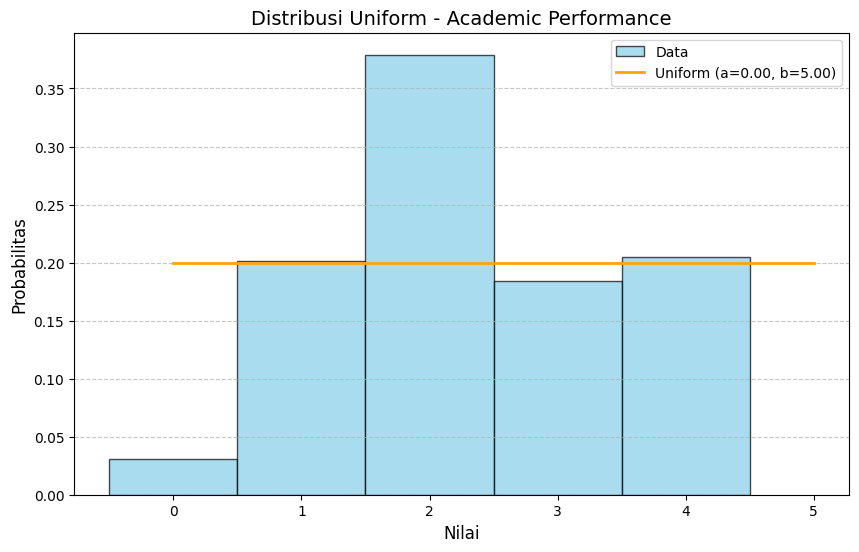

Hasil Perhitungan Distribusi Uniform:
- Mean (Rata-rata): 2.50
- Variance (Variansi): 2.08
- Standard Deviation (Standar Deviasi): 1.44

Uji Goodness-of-Fit (Kolmogorov-Smirnov Test):
- Statistic: 0.2064
- p-value: 0.0000
Kesimpulan: Data tidak sesuai dengan distribusi Uniform (perbedaan signifikan ditemukan).


In [ ]:
# Import library tambahan
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, kstest

# Variabel Academic Performance
academic_performance = data['academic_performance']

# Parameter Distribusi Uniform
a, b = min(academic_performance), max(academic_performance)

# Distribusi Uniform
x = np.linspace(a, b, 100)
uniform_pdf = uniform.pdf(x, loc=a, scale=b-a)

# Plot histogram dan distribusi Uniform
plt.figure(figsize=(10, 6))
plt.hist(academic_performance, bins=np.arange(a, b + 1) - 0.5, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Data")
plt.plot(x, uniform_pdf, color='orange', label=f"Uniform (a={a:.2f}, b={b:.2f})", linewidth=2)
plt.title("Distribusi Uniform - Academic Performance", fontsize=14)
plt.xlabel("Nilai", fontsize=12)
plt.ylabel("Probabilitas", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Tampilkan hasil perhitungan
mean_uniform = (a + b) / 2  # Mean uniform
var_uniform = ((b - a) ** 2) / 12  # Variansi uniform
std_uniform = np.sqrt(var_uniform)  # Standar deviasi uniform

print(f"Hasil Perhitungan Distribusi Uniform:")
print(f"- Mean (Rata-rata): {mean_uniform:.2f}")
print(f"- Variance (Variansi): {var_uniform:.2f}")
print(f"- Standard Deviation (Standar Deviasi): {std_uniform:.2f}")

# Uji Goodness-of-Fit (Kolmogorov-Smirnov Test)
stat_ks, p_ks = kstest(academic_performance, 'uniform', args=(a, b-a))
print("\nUji Goodness-of-Fit (Kolmogorov-Smirnov Test):")
print(f"- Statistic: {stat_ks:.4f}")
print(f"- p-value: {p_ks:.4f}")

# Kesimpulan Uji Goodness-of-Fit
if p_ks > 0.05:
    print("Kesimpulan: Data sesuai dengan distribusi Uniform (tidak ada perbedaan signifikan).")
else:
    print("Kesimpulan: Data tidak sesuai dengan distribusi Uniform (perbedaan signifikan ditemukan).")
